In [2]:
import config
from DISClib.ADT import list as lt

def defaultfunction(id1, id2):
    if type(id1) != type(id2):
        id1 = str(id1)
        id2 = str(id2)
    if id1 > id2:
        return 1
    elif id1 < id2:
        return -1
    return 0

class listaEnlazada():
    def __init__(self, type):
        self.type = type
        if type == 1: 
            self.estructura = lt.newList(datastructure='SINGLE_LINKED', cmpfunction=defaultfunction)
        elif type == 2:
            self.estructura = lt.newList(datastructure='DOUBLE_LINKED', cmpfunction=defaultfunction)
    
    def addNode_byValue(self, infoNodo):
        lt.addLast(self.estructura, infoNodo)
    
    def deleteNode_byValue(self, infoNodo):
        pos = lt.isPresent(self.estructura, infoNodo)
        if pos > 1:
            lt.deleteElement(self.estructura, pos)
            return True
        elif pos == 1:
            lt.removeFirst(self.estructura)
            return True
        else:
            return False
    
    def getNodeValues(self):
        lst = list()
        iter = lt.iterator(self.estructura)
        for i in iter:
            lst.append(i)
        return lst
    
    def isNodeValue(self, infoNodo):
        if lt.isPresent(self.estructura, infoNodo) != 0:
            return True
        else:
            return False
    
    def findAdjacentNode(self, infoNodo):
        lst = list()
        pos = lt.isPresent(self.estructura, infoNodo)
        size = lt.size(self.estructura)
        if pos > 0:
            if self.type == 2 and pos-1 > 0:
                lst.append(lt.getElement(self.estructura, pos-1))
            if pos+1 <= size:
                lst.append(lt.getElement(self.estructura, pos+1))
        return lst
    
def createTuples(nodos, tipo):
    tuples = list()
    if tipo == 1:
        ids = range(0,len(nodos)+2)
        tuples.append((ids[0],'First'))
        for i in range(1,len(ids)-1):
            tuples.append((ids[i],nodos[i-1]))
        if len(nodos) > 0:
            tuples.append((ids[len(nodos)+1],'None'))
    else:
        ids = range(0,len(nodos)+3)
        tuples.append((ids[0],'First'))
        if len(nodos) > 0:
            tuples.append((ids[1],'None'))
            for i in range(2,len(ids)-1):
                tuples.append((ids[i],nodos[i-2]))
            tuples.append((ids[len(nodos)+2],'None'))
    return tuples


entra3
entra3


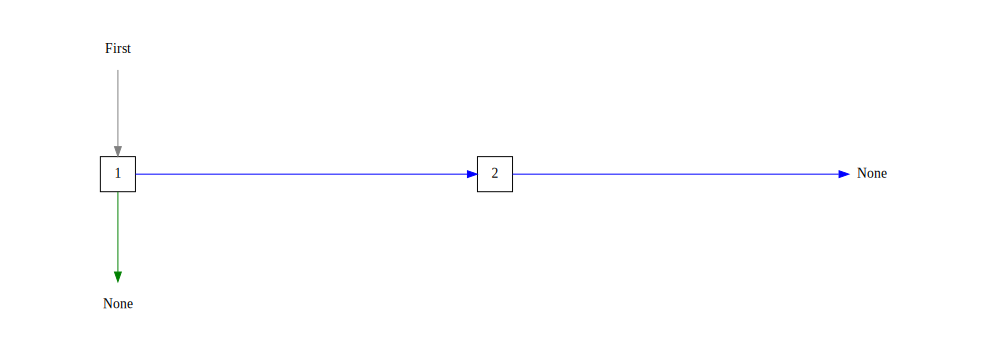

In [59]:
from graphviz import Digraph, Graph

dot = Digraph()
nodosX = []
tipo = 2
colorPointer = 'grey'
colorRight = 'blue'
colorLeft = 'green'
colorHigh = 'red'
dot.graph_attr = {
    'rankdir': 'LR',
    'center': 'true',
    'size':'14,5',
    'ratio':'fill'
}

lista = listaEnlazada(2)
lista.addNode_byValue(1)
lista.addNode_byValue(2)

nodos = lista.getNodeValues()
tuples = createTuples(nodos, 2)
for i,j in tuples:
    if j == 'First' or j == 'None':
        dot.node(name=str(i), label=str(j), shape="square", color='white')
    elif j in nodosX:
        dot.node(name=str(i), label=str(j), shape="square", color=colorHigh)
    else:
        dot.node(name=str(i), label=str(j), shape="square")
if len(nodos) == 0:
    dot.node(name='-1', label='', shape="square", color='white')
    dot.edge(str(tuples[0][0]), str('-1'), color=colorPointer)
else:
    for i in range(1,len(tuples)):
        if tuples[i-1][1] == 'First' and tuples[i][1] != 'None':
            print('entra1')
            dot.edge(str(tuples[i-1][0]), str(tuples[i][0]), color=colorPointer)
#       elif tuples[i-1][1] == 'First' and tuples[i][1] == 'None':
#            print('entra2', tuples[i-1][1], tuples[i+1][1])
#            dot.edge(str(tuples[i-1][0]), str(tuples[i+1][0]), color=colorPointer)
        elif tuples[i-1][1] != 'None' and tuples[i-1][1] != 'First':
            print('entra3')
            dot.edge(str(tuples[i-1][0]), str(tuples[i][0]), color=colorRight)
    if tipo == 2:
        if len(tuples) > 1:
            attrs = {'constraint' : 'false', 'rankdir': 'TB'}
            dot.edge(str(tuples[0][0]), str(tuples[2][0]), color=colorPointer,**attrs)
            
            attrs = {'constraint' : 'false', 'rankdir': 'RL',}
            dot.edge(str(tuples[2][0]), str(tuples[1][0]), color=colorLeft,**attrs)
display(dot)